In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [3]:
features = 'ALL'
dbscan = pd.read_csv('../../Experiments/dbscan/Results/dbscan_totalRes_'+features+'.csv')
wdbscan = pd.read_csv('../../Experiments/wdbscan/Results/wdbscan_totalRes_'+features+'.csv')
lof = pd.read_csv('../../Experiments/lof/Results/lof_totalRes_'+features+'.csv')
exactSTORM = pd.read_csv('../../Experiments/exactSTORM/Results/exactSTORM_totalRes_'+features+'.csv')
COD = pd.read_csv('../../Experiments/COD/Results/COD_totalRes_'+features+'.csv')
rrcf = pd.read_csv('../../Experiments/rrcf/Results/rrcf_totalRes_'+features+'.csv')

In [8]:
def get_filtered(data):
    return gaussian_filter(data, sigma=1)

def get_dbscan_heatmap(df):
    data = df.groupby(['epsilon','min_samples']).mean()['fscore'].unstack()
    X = list(data.columns)
    Y = list(data.index)
    Z = data.values
    
    return X, Y, get_filtered(Z)

def get_wdbscan_heatmap(df):
    data = df.groupby(['epsilon','window']).mean()['fscore'].unstack()
    X = list(data.columns)
    Y = list(data.index)
    Z = data.values
    return X, Y, get_filtered(Z)    
    
def get_wdbscan_heatmap_2(df):
    data = df.groupby(['epsilon','min_samples']).mean()['fscore'].unstack()
    X = list(data.columns)
    Y = list(data.index)
    Z = data.values    
    return X, Y, get_filtered(Z)

def get_lof_heatmap(df):
    data = df.groupby(['n_neighbors','contamination']).mean()['fscore'].unstack().T
    X = list(data.columns)
    Y = list(data.index)
    Z = data.values
    
    return X, Y, get_filtered(Z)

def get_exactSTORM(df):
    data = df.groupby(['window','k']).mean()['fscore'].unstack()
    X = list(data.columns)
    Y = list(data.index)
    Z = data.values
    return X, Y, get_filtered(Z)

def get_exactSTORM_2(df):
    data = df.groupby(['radius', 'window']).mean()['fscore'].unstack()
    X = list(data.columns)
    Y = list(data.index)
    Z = data.values
    return X, Y, get_filtered(Z)  

def get_exactSTORM_3(df):
    data = df.groupby(['radius','k']).mean()['fscore'].unstack()
    X = list(data.columns)
    Y = list(data.index)
    Z = data.values
    return X, Y, get_filtered(Z) 

def get_exactSTORM_4(df):
    data = df.groupby(['window','query_timespan']).mean()['fscore'].unstack()
    X = list(data.columns)
    Y = list(data.index)
    Z = data.values
    return X, Y, get_filtered(Z) 

def get_COD(df):
    data = df.groupby(['k','R']).mean()['fscore'].unstack()
    X = list(data.columns)
    Y = list(data.index)
    Z = data.values
    return X, Y, get_filtered(Z)

def get_COD2(df):
    data = df.groupby(['R','window']).mean()['fscore'].unstack()
    X = list(data.columns)
    Y = list(data.index)
    Z = data.values
    return X, Y, get_filtered(Z)  

def get_rrcf(df):
    data = df.groupby(['contamination', 'tree_size']).mean()['fscore'].unstack()
    X = list(data.columns)
    Y = list(data.index)
    Z = data.values
    return X, Y, get_filtered(Z)

levels_ = {
    'dbscan':17,
    'wdbscan':10,
    'lof':10,
    'exactSTORM':15,
    'exactSTORM_2':15,
    'exactSTORM_3':15,
    'exactSTORM_4':15,
    'KNN':25,
    'COF':25,
    'COD':25,
    'COD2': 25, 
    'rrcf': 25
}

fontsizeLabel = 22
fontsizeTicks = 22
fontsizeCurves = 15

def plot(X, Y, Z, levels, axis, model, type_method='offline'):
    
    if type_method == 'offline':
        CS = axis.contour(X, Y, Z, levels = levels, origin='lower', cmap='Greys', linewidths=1)
        axis.contourf(X, Y, Z, levels = levels, origin='lower', cmap='Blues', alpha=0.5)
    else:
        CS = axis.contour(X, Y, Z, levels = levels, origin='lower', cmap='Greys', linewidths=1)
        axis.contourf(X, Y, Z, levels = levels, origin='lower', cmap='Greens', alpha=0.5)        

    axis.clabel(CS, inline=1, fmt='%1.2f', fontsize=fontsizeCurves)

    axis.tick_params(axis='both', which='major', labelsize=fontsizeLabel)
    axis.tick_params(axis='both', which='minor', labelsize=fontsizeLabel)


    if model == 'dbscan':
        axis.set_ylabel(r'$\epsilon$', fontsize=fontsizeLabel, labelpad=25)
        axis.set_xlabel(r'$MinPTS$', fontsize=fontsizeLabel)    
    elif model == 'wdbscan':
        axis.set_ylabel(r'$\epsilon$', fontsize=fontsizeLabel, labelpad=25)
        axis.set_xlabel('window size $w$', fontsize=fontsizeLabel)  
    elif model == 'lof':
        axis.set_xlabel('n_neighbors', fontsize=fontsizeLabel)
        axis.set_ylabel('contamination', fontsize=fontsizeLabel)
    elif model == 'exactSTORM':
        axis.set_xlabel('k', fontsize=fontsizeLabel)
        axis.set_ylabel('window', fontsize=fontsizeLabel)
    elif model == 'exactSTORM_2':
        axis.set_xlabel('window size w', fontsize=fontsizeLabel)
        axis.set_ylabel('R', fontsize=fontsizeLabel)  
    elif model == 'exactSTORM_3':
        axis.set_xlabel('k', fontsize=fontsizeLabel)
        axis.set_ylabel('radius', fontsize=fontsizeLabel)
    elif model == 'exactSTORM_4':
        axis.set_xlabel('query', fontsize=fontsizeLabel)
        axis.set_ylabel('radius', fontsize=fontsizeLabel) 
    elif model == 'KNN':
        axis.set_xlabel('n', fontsize=fontsizeLabel)
        axis.set_ylabel('contamination', fontsize=fontsizeLabel)  
    elif model == 'COF':
        axis.set_xlabel('n', fontsize=fontsizeLabel)
        axis.set_ylabel('contamination', fontsize=fontsizeLabel)
    elif model == 'COD':
        axis.set_xlabel('R', fontsize=fontsizeLabel)
        axis.set_ylabel('k', fontsize=fontsizeLabel)   
    elif model == 'COD2':
        axis.set_xlabel('window size w', fontsize=fontsizeLabel)
        axis.set_ylabel('R', fontsize=fontsizeLabel)
    elif model == 'rrcf':
        axis.set_xlabel('tree size w', fontsize=fontsizeLabel)
        axis.set_ylabel('contamination', fontsize=fontsizeLabel)
    else:
        sys.exit('unknown model')

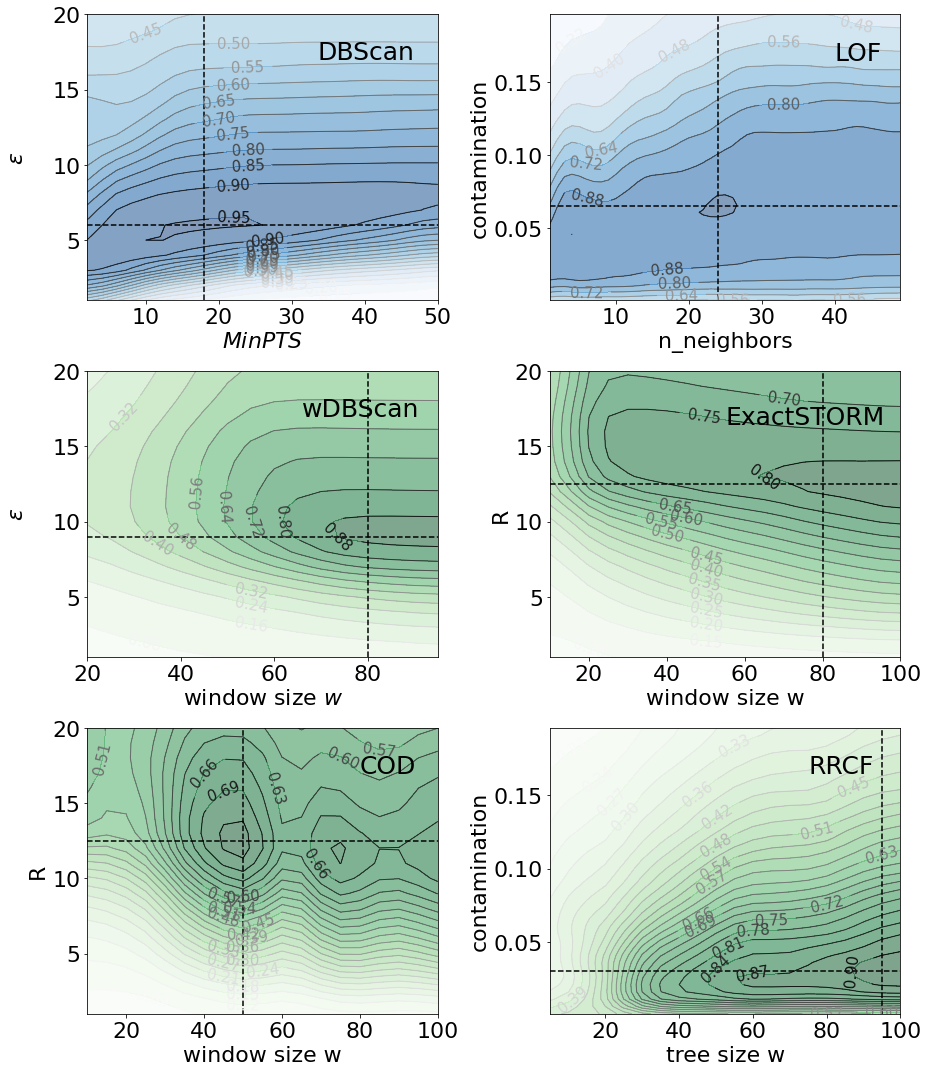

In [9]:
fig, ax = plt.subplots(3, 2, figsize=(13,15))

model = 'dbscan'
X, Y, Z = get_dbscan_heatmap(dbscan)
levels = levels_[model]
plot(X,Y,Z, levels, ax[0][0], model)

model = 'lof'
X, Y, Z = get_lof_heatmap(lof)
levels = levels_[model]
plot(X,Y,Z, levels, ax[0][1], model)

model = 'wdbscan'
X, Y, Z = get_wdbscan_heatmap(wdbscan)
levels = levels_[model]
plot(X,Y,Z, levels, ax[1][0], model, type_method='online')

model = 'exactSTORM_2'
X, Y, Z = get_exactSTORM_2(exactSTORM)
levels = levels_[model]
plot(X,Y,Z, levels, ax[1][1], model, type_method='online')

model = 'COD2'
X, Y, Z = get_COD2(COD)
levels = levels_[model]
plot(X,Y,Z, levels, ax[2][0], model, type_method='online')

model = 'rrcf'
X, Y, Z = get_rrcf(rrcf)
levels = levels_[model]
plot(X,Y,Z, levels, ax[2][1], model, type_method='online')

ax[0][0].text(33.5, 17, 'DBScan', fontsize = 25)
ax[0][0].axhline(6, c='k', linestyle='--')
ax[0][0].axvline(18, c='k', linestyle='--')

ax[0][1].text(40, 0.165, 'LOF', fontsize = 25)
ax[0][1].axhline(0.065, c='k', linestyle='--')
ax[0][1].axvline(24, c='k', linestyle='--')

ax[1][0].text(66, 17, 'wDBScan', fontsize = 25)
ax[1][0].axhline(9, c='k', linestyle='--')
ax[1][0].axvline(80, c='k', linestyle='--')

ax[1][1].text(55, 16.5, 'ExactSTORM', fontsize = 25)
ax[1][1].axhline(12.5, c='k', linestyle='--')
ax[1][1].axvline(80, c='k', linestyle='--')

ax[2][0].text(80, 17, 'COD', fontsize = 25)
ax[2][0].axhline(12.5, c='k', linestyle='--')
ax[2][0].axvline(50, c='k', linestyle='--')

ax[2][1].text(75, 0.165, 'RRCF', fontsize = 25)
ax[2][1].axhline(0.03, c='k', linestyle='--')
ax[2][1].axvline(95, c='k', linestyle='--')

fig.tight_layout()
fig.savefig('tuning_heatmaps.pdf', bbox_inches='tight', pad_inches=0)